In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:496: FutureWa

In [2]:
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv('C:/Users/lenovo/python_code/london_merged.csv')
dataset.head(22)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015/1/4 0:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,2015/1/4 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,2015/1/4 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,2015/1/4 3:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,2015/1/4 4:00,47,2.0,0.0,93.0,6.5,1,0,1,3
5,2015/1/4 5:00,46,2.0,2.0,93.0,4.0,1,0,1,3
6,2015/1/4 6:00,51,1.0,-1.0,100.0,7.0,4,0,1,3
7,2015/1/4 7:00,75,1.0,-1.0,100.0,7.0,4,0,1,3
8,2015/1/4 8:00,131,1.5,-1.0,96.5,8.0,4,0,1,3
9,2015/1/4 9:00,301,2.0,-0.5,100.0,9.0,3,0,1,3


In [4]:
df = dataset.iloc[:,1:6]
df = np.array(df)
print(df)

[[182.    3.    2.   93.    6. ]
 [138.    3.    2.5  93.    5. ]
 [134.    2.5   2.5  96.5   0. ]
 ...
 [337.    5.5   1.5  78.5  24. ]
 [224.    5.5   1.5  76.   23. ]
 [139.    5.    1.   76.   22. ]]


In [5]:
for i in range(5):
    df[:,i] = df[:,i]/(df[:,i].max()-df[:,i].min())

In [6]:
x = df[:,1:5]
x

array([[0.08450704, 0.05      , 1.16981132, 0.10619469],
       [0.08450704, 0.0625    , 1.16981132, 0.08849558],
       [0.07042254, 0.0625    , 1.21383648, 0.        ],
       ...,
       [0.15492958, 0.0375    , 0.98742138, 0.42477876],
       [0.15492958, 0.0375    , 0.95597484, 0.40707965],
       [0.14084507, 0.025     , 0.95597484, 0.38938053]])

In [7]:
y = df[:,0]
y

array([0.02315522, 0.01755725, 0.01704835, ..., 0.04287532, 0.02849873,
       0.01768448])

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

In [9]:
x_train = scale(x_train)
x_test = scale(x_test)
y_train = scale(y_train.reshape((-1,1)))
y_test = scale(y_test.reshape((-1,1)))

In [10]:
def add_layer(inputs,input_size,output_size,activation_function = None):
    with tf.variable_scope("Weights"):
        Weights = tf.Variable(tf.random_normal(shape = [input_size,output_size]),name = "weights")
    with tf.variable_scope("biases"):
        biases = tf.Variable(tf.zeros(shape = [1,output_size]) + 0.1,name = "biases")
    with tf.name_scope("Wx_plus_b"):
        Wx_plus_b = tf.matmul(inputs,Weights)+biases
    with tf.name_scope("dropout"):
        Wx_plus_b = tf.nn.dropout(Wx_plus_b,keep_prob = keep_prob_s)
    if activation_function is None:
        return Wx_plus_b
    else:
        with tf.name_scope("activation_function"):
            return activation_function(Wx_plus_b)

In [11]:
xs = tf.placeholder(shape = [None,x_train.shape[1]],dtype=tf.float32,name="inputs")
ys = tf.placeholder(shape = [None,1],dtype = tf.float32,name="y_true")
keep_prob_s = tf.placeholder(dtype=tf.float32)

In [12]:
with tf.name_scope("layer_1"):
    l1 = add_layer(xs,4,24,activation_function = tf.nn.sigmoid)

In [13]:
with tf.name_scope("layer_2"):
    l2 = add_layer(l1,24,62,activation_function = tf.nn.sigmoid)

In [14]:
with tf.name_scope("layer_3"):
    l3 = add_layer(l2,62,33,activation_function = tf.nn.sigmoid)

In [15]:
with tf.name_scope("layer_4"):
    l4 = add_layer(l3,33,22,activation_function = tf.nn.sigmoid)

In [16]:
with tf.name_scope("layer_5"):
    l5 = add_layer(l4,22,18,activation_function = tf.nn.sigmoid)

In [17]:
with tf.name_scope('y_pred'):
    pred = add_layer(l5,18,1)

In [18]:
with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-pred),reduction_indices=[1]))  #mse
    tf.summary.scalar("loss",tensor = loss)

In [19]:
with tf.name_scope("train"):
    train_op = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(loss)
    #train_op = tf.train.AdamOptimizer(learning_rate = 0.01).minimize(loss)

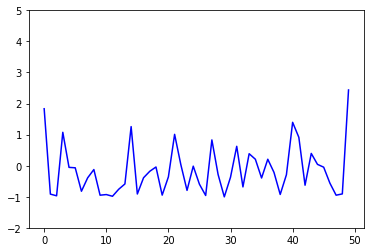

In [20]:
#draw pics
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(50),y_train[0:50],'b')
ax.set_ylim([-2,5])
plt.ion()
plt.show()

In [21]:
#parameters
keep_prob = 0.8 #prevent overfitting
ITER = 210 #training times

In [22]:
def fit(x,y,ax,n,keep_prob):
    init = tf.global_variables_initializer()
    feed_dict_train = {ys:y_train,xs:x_train,keep_prob_s:keep_prob}
    with tf.Session() as sess:
        saver = tf.train.Saver(tf.global_variables(),max_to_keep=15)
        merged = tf.summary.merge_all()
        writer = tf.summary.FileWriter(logdir = "e:/log",graph = sess.graph)
        sess.run(init)
        for i in range(n):
            _loss,_ = sess.run([loss,train_op],feed_dict = feed_dict_train)
            
            if i% 10 == 0:
                print("epoch:%d\tloss:%.5f"%(i,_loss))
                y_pred = sess.run(pred,feed_dict = feed_dict_train)
                rs = sess.run(merged,feed_dict = feed_dict_train)
                writer.add_summary(summary=rs,global_step = i)
                try:
                    ax.lines.remove(lines[0])
                except:
                    pass

In [23]:
fit(x=x_train,y=y_train,n=ITER,keep_prob=keep_prob,ax=ax)

epoch:0	loss:13.41955
epoch:10	loss:1.56585
epoch:20	loss:1.50200
epoch:30	loss:1.48959
epoch:40	loss:1.49854
epoch:50	loss:1.49948
epoch:60	loss:1.42938
epoch:70	loss:1.43333
epoch:80	loss:1.44107
epoch:90	loss:1.42671
epoch:100	loss:1.41626
epoch:110	loss:1.43010
epoch:120	loss:1.40678
epoch:130	loss:1.39139
epoch:140	loss:1.38715
epoch:150	loss:1.35483
epoch:160	loss:1.34255
epoch:170	loss:1.35345
epoch:180	loss:1.34077
epoch:190	loss:1.31517
epoch:200	loss:1.31840


In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [25]:
def predict(x,y,ax,n,keep_prob):
    init = tf.global_variables_initializer()
    feed_dict_test = {ys:y_test,xs:x_test,keep_prob_s:keep_prob}
    with tf.Session() as sess:
        merged = tf.summary.merge_all()
        sess.run(init)
        for i in range(n):
            _loss,_ = sess.run([loss,train_op],feed_dict = feed_dict_test)
            
            if i% 10 == 0:
                print("epoch:%d\tMSE:%.5f"%(i,_loss))
                y_pred = sess.run(pred,feed_dict = feed_dict_test)
                mae = mean_absolute_error(y_test,y_pred)
                print("MAE:%.5f"%(mae))
                print("r2_score:%.5f"%(r2_score(y_test,y_pred)))
                rs = sess.run(merged,feed_dict = feed_dict_test)
                try:
                    ax.lines.remove(lines[0])
                except:
                    pass
                fig = plt.figure()
                ax = fig.add_subplot(1,1,1)
                ax.plot(range(70),y_test[0:70],'b')
                ax.plot(range(70),y_pred[0:70],'r--')
                plt.title("Deep Neural Network")
                plt.show()
                plt.pause(1)

epoch:0	MSE:31.33163
MAE:3.62321
r2_score:-15.96528


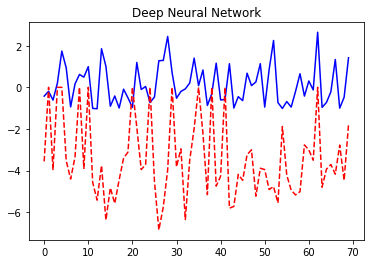

epoch:10	MSE:1.89033
MAE:1.08281
r2_score:-0.94281


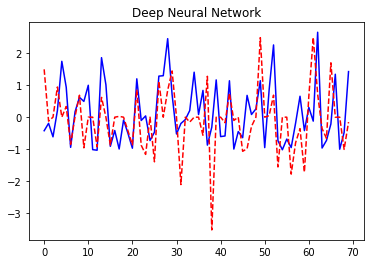

epoch:20	MSE:1.81111
MAE:1.04542
r2_score:-0.76375


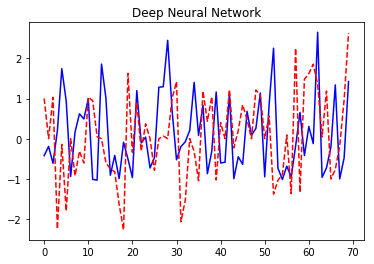

epoch:30	MSE:1.76902
MAE:1.03010
r2_score:-0.74856


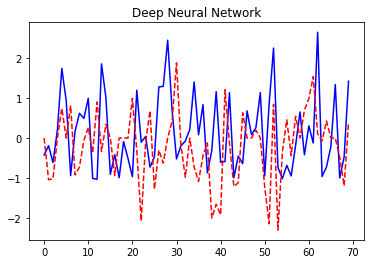

epoch:40	MSE:1.73772
MAE:1.01255
r2_score:-0.67080


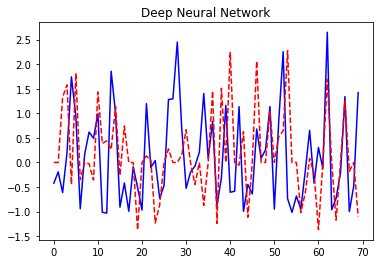

epoch:50	MSE:1.67636
MAE:1.02449
r2_score:-0.70024


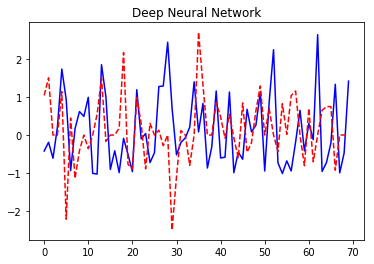

epoch:60	MSE:1.63055
MAE:1.02309
r2_score:-0.70823


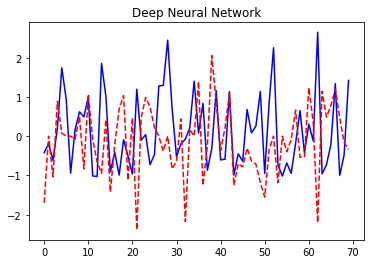

epoch:70	MSE:1.67716
MAE:1.00335
r2_score:-0.63314


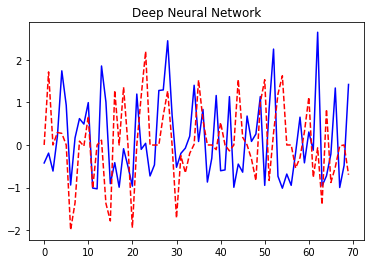

epoch:80	MSE:1.58599
MAE:0.98662
r2_score:-0.59272


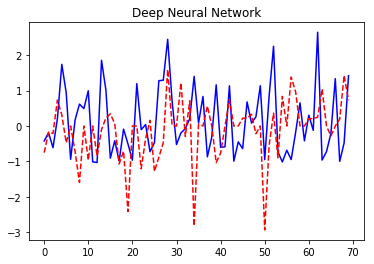

epoch:90	MSE:1.61012
MAE:1.00200
r2_score:-0.63121


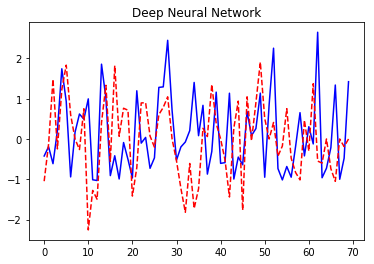

epoch:100	MSE:1.58982
MAE:0.98507
r2_score:-0.56860


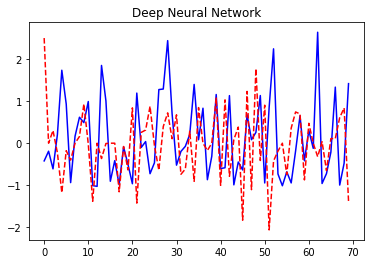

epoch:110	MSE:1.54630
MAE:0.97090
r2_score:-0.52734


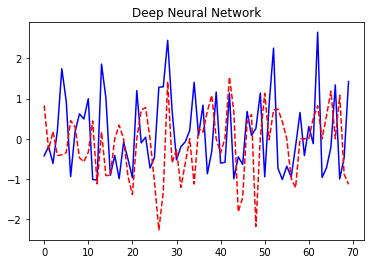

epoch:120	MSE:1.52883
MAE:0.96662
r2_score:-0.53185


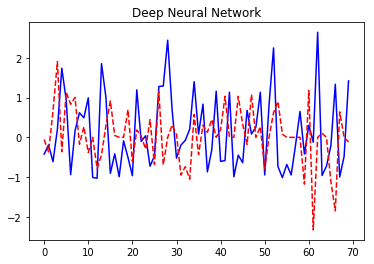

epoch:130	MSE:1.50817
MAE:0.96470
r2_score:-0.52012


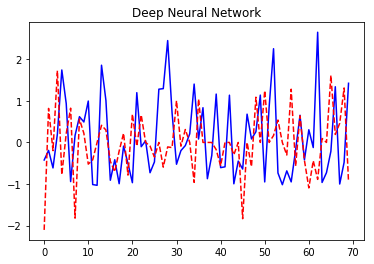

epoch:140	MSE:1.48934
MAE:0.95970
r2_score:-0.47191


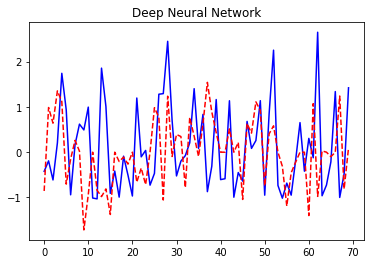

epoch:150	MSE:1.50074
MAE:0.96046
r2_score:-0.49703


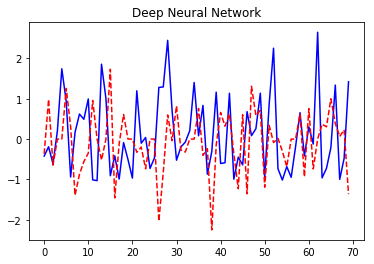

epoch:160	MSE:1.46574
MAE:0.96315
r2_score:-0.50058


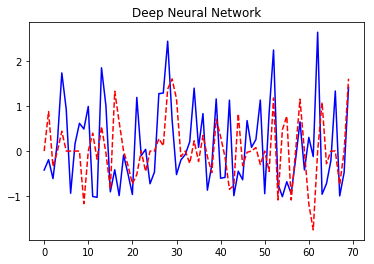

epoch:170	MSE:1.48163
MAE:0.94029
r2_score:-0.44937


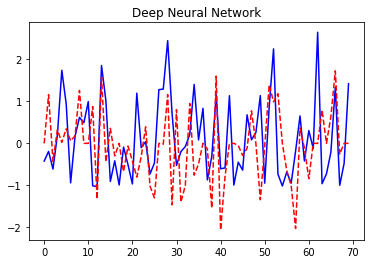

epoch:180	MSE:1.45698
MAE:0.93504
r2_score:-0.44326


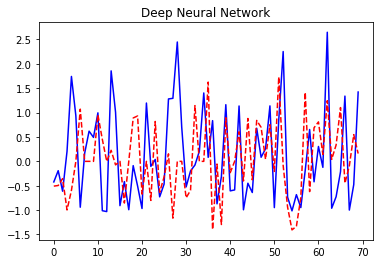

epoch:190	MSE:1.44823
MAE:0.92325
r2_score:-0.38372


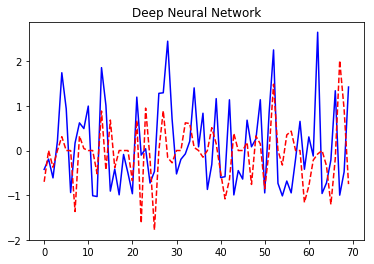

epoch:200	MSE:1.38477
MAE:0.92501
r2_score:-0.39704


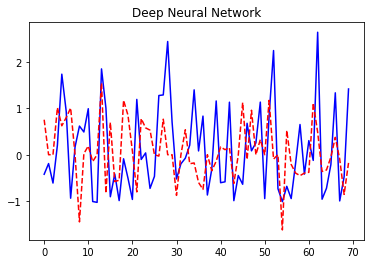

In [26]:
y_pred = predict(x=x_test,y=y_test,keep_prob=keep_prob,n=ITER,ax =ax)